# Algorithm Evalution

In [28]:
from warnings import filterwarnings
filterwarnings('ignore')

In [29]:
import pandas as pd
df = pd.read_csv('Datasets/tested.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Seperate X and Y features

In [30]:
X = df.drop(columns=['Name','PassengerId','Survived','Ticket','Cabin'])
Y = df['Survived']

## Seperate cat con Features for X

In [31]:
from PM6func import catconsep
cat, con  = catconsep(X)

In [32]:
cat

['Sex', 'Embarked']

In [33]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

## Preprocess the X

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                         ('scaler', StandardScaler())])
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                         ('Ohe', OneHotEncoder(handle_unknown='ignore'))])
pre = ColumnTransformer([('num', num_pipeline, con),
                         ('cat', cat_pipeline, cat)])


In [35]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 0.87348191,  0.3349926 , -0.49947002, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.87348191,  1.32553003,  0.61699237, ...,  0.        ,
         0.        ,  1.        ],
       [-0.31581919,  2.51417495, -0.49947002, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.87348191,  0.65196458, -0.49947002, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.87348191,  0.        , -0.49947002, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.87348191,  0.        ,  0.61699237, ...,  1.        ,
         0.        ,  0.        ]], shape=(418, 10))

In [36]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'], dtype=object)

In [37]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.873482,0.334993,-0.499470,-0.400248,-0.498407,0.0,1.0,0.0,1.0,0.0
1,0.873482,1.325530,0.616992,-0.400248,-0.513274,1.0,0.0,0.0,0.0,1.0
2,-0.315819,2.514175,-0.499470,-0.400248,-0.465088,0.0,1.0,0.0,1.0,0.0
3,0.873482,-0.259330,-0.499470,-0.400248,-0.483466,0.0,1.0,0.0,0.0,1.0
4,0.873482,-0.655545,0.616992,0.619896,-0.418471,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,0.873482,0.000000,-0.499470,-0.400248,-0.494448,0.0,1.0,0.0,0.0,1.0
414,-1.505120,0.691586,-0.499470,-0.400248,1.313753,1.0,0.0,1.0,0.0,0.0
415,0.873482,0.651965,-0.499470,-0.400248,-0.508792,0.0,1.0,0.0,0.0,1.0
416,0.873482,0.000000,-0.499470,-0.400248,-0.494448,0.0,1.0,0.0,0.0,1.0


## Train Test split
- 70% train data
- 30% test data

In [38]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=42)

## Create a dictionary of all models

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [40]:
dict = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

## Find F1 score for all models

In [41]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [42]:
tr = []
ts = []
tr_cv = []
for name, model in dict.items():
    # train model with train data
    model.fit(xtrain, ytrain)
    # predict result
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # find f1 score for train and test data
    f1_tr = f1_score(ytrain, ypred_tr)
    f1_ts = f1_score(ytest, ypred_ts)
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # append it to the list
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)
    #print the scores of all models
    print(f"Model Name : {name}\n")
    print(f"F1 Score of Train: {f1_tr}\n")
    print(f"F1 Score of Test: {f1_ts}\n")
    print(f"F1 Score of CV: {f1_cv}\n")

Model Name : Logistic Regression

F1 Score of Train: 1.0

F1 Score of Test: 1.0

F1 Score of CV: 1.0

Model Name : Random Forest

F1 Score of Train: 1.0

F1 Score of Test: 1.0

F1 Score of CV: 1.0

Model Name : Decision Tree

F1 Score of Train: 1.0

F1 Score of Test: 1.0

F1 Score of CV: 1.0

Model Name : Gradient Boosting Classifier

F1 Score of Train: 1.0

F1 Score of Test: 1.0

F1 Score of CV: 1.0

Model Name : SVM

F1 Score of Train: 1.0

F1 Score of Test: 0.975

F1 Score of CV: 0.9667170297628745

Model Name : KNN

F1 Score of Train: 0.981651376146789

F1 Score of Test: 0.9629629629629629

F1 Score of CV: 0.9816557776545032



### create a dataframe for scores of models

In [43]:
results = {
    'Model Name': dict.keys(),
    'F1_train': tr,
    'F1_test': ts,
    'F1_cv': tr_cv
}

In [44]:
results = pd.DataFrame(results)
results

,Model Name,F1_train,F1_test,F1_cv
0,Logistic Regression,1.000000,1.000000,1.000000
1,Random Forest,1.000000,1.000000,1.000000
2,Decision Tree,1.000000,1.000000,1.000000
3,Gradient Boosting Classifier,1.000000,1.000000,1.000000
4,SVM,1.000000,0.975000,0.966717
5,KNN,0.981651,0.962963,0.981656


## train the model

In [45]:
best_model = LogisticRegression()
best_model.fit(xtrain, ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [46]:
best_model.score(xtrain, ytrain)

1.0

In [47]:
best_model.score(xtest, ytest)

1.0

In [48]:
yres_tr = best_model.predict(xtrain)
yres_ts = best_model.predict(xtest)
yres_tr[0:5]

array([0, 0, 1, 0, 0])

In [49]:
ytrain.head()

118    0
271    0
114    1
311    0
131    0
Name: Survived, dtype: int64

In [50]:
yres_ts[:5]

array([0, 1, 0, 0, 1])

In [51]:
ytest.head()

321    0
324    1
388    0
56     0
153    1
Name: Survived, dtype: int64

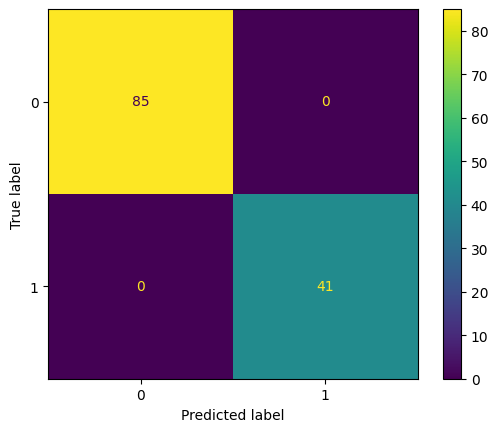

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, yres_ts)
cfd= ConfusionMatrixDisplay(cf, display_labels=['0','1'])
cfd.plot()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yres_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



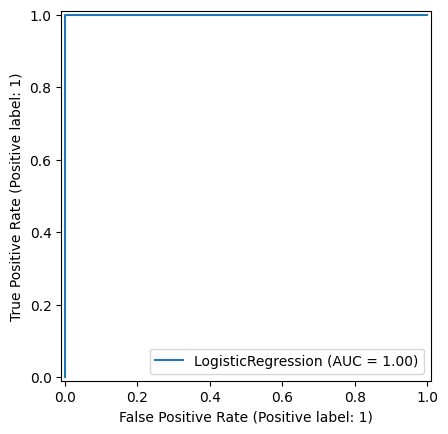

In [54]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model, xtrain, ytrain)